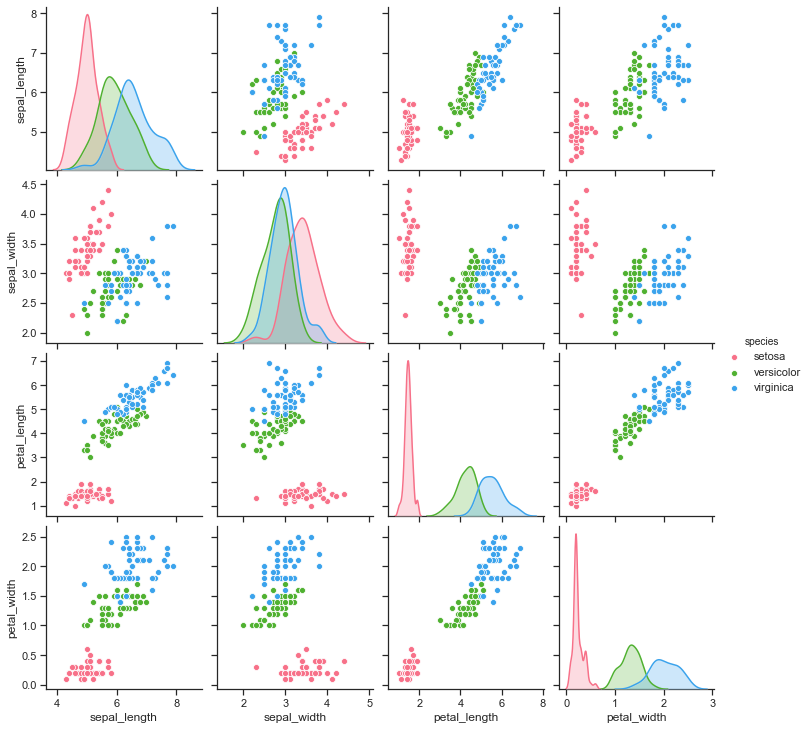

In [1]:
#케라스를 이용한 붓꽃 분류하기

#1. 데이터 확인하기
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style = "ticks", color_codes = True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", palette="husl")

In [2]:
#2.데이터 확인하기
#150개의 입력(4개의 속성)과 출력(3개의 종)
iris.info()
iris['species'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
#3.데이터 변환후, 문자열로 된 이름에 라벨링,
#번호를 one-hot 형식으로 변환하기

from sklearn.preprocessing import LabelEncoder

X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

print(Y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [8]:
#4.훈련 데이터(120)와 테스트 데이터(30) 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [11]:
#학습모델 만들기
#케라스 패키지 불러오기

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

#모델 객체 정의하기
# 입력층(출력뉴런수:64, 활성함수 : relu)
#히든층(출력뉴런수: 64, 활성함수: relu)
#출력층(출력뉴런수: 3, 활성함수: softmax)

model = Sequential()

model.add(Dense(64, input_shape=(4,), activation = 'relu'))
model.add(Dense(64,activation ='relu'))
model.add(Dense(3, activation='softmax'))

#모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [12]:
#학습하기
hist =  model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 1ms/step - loss: 1.5413 - accuracy: 0.3083 - val_loss: 1.1293 - val_accuracy: 0.4333
Epoch 2/100
120/120 [==============================] - 0s 58us/step - loss: 1.2686 - accuracy: 0.3583 - val_loss: 1.0703 - val_accuracy: 0.3667
Epoch 3/100
120/120 [==============================] - 0s 75us/step - loss: 1.1127 - accuracy: 0.3417 - val_loss: 1.0604 - val_accuracy: 0.3667
Epoch 4/100
120/120 [==============================] - 0s 67us/step - loss: 1.0513 - accuracy: 0.4833 - val_loss: 1.0663 - val_accuracy: 0.5667
Epoch 5/100
120/120 [==============================] - 0s 58us/step - loss: 0.9978 - accuracy: 0.6917 - val_loss: 1.0500 - val_accuracy: 0.5000
Epoch 6/100
120/120 [==============================] - 0s 50us/step - loss: 0.9659 - accuracy: 0.5500 - val_loss: 1.0265 - val_accuracy: 0.3667
Epoch 7/100
120/120 [==============================] - 0s 58us/step - loss: 0.9411 - accura

120/120 [==============================] - 0s 83us/step - loss: 0.1576 - accuracy: 0.9750 - val_loss: 0.1943 - val_accuracy: 1.0000
Epoch 56/100
120/120 [==============================] - 0s 83us/step - loss: 0.1557 - accuracy: 0.9750 - val_loss: 0.1947 - val_accuracy: 0.9667
Epoch 57/100
120/120 [==============================] - 0s 83us/step - loss: 0.1510 - accuracy: 0.9750 - val_loss: 0.1932 - val_accuracy: 0.9667
Epoch 58/100
120/120 [==============================] - 0s 58us/step - loss: 0.1517 - accuracy: 0.9750 - val_loss: 0.1804 - val_accuracy: 1.0000
Epoch 59/100
120/120 [==============================] - 0s 66us/step - loss: 0.1420 - accuracy: 0.9750 - val_loss: 0.1926 - val_accuracy: 0.9667
Epoch 60/100
120/120 [==============================] - 0s 50us/step - loss: 0.1415 - accuracy: 0.9667 - val_loss: 0.1950 - val_accuracy: 0.9667
Epoch 61/100
120/120 [==============================] - 0s 66us/step - loss: 0.1373 - accuracy: 0.9667 - val_loss: 0.1767 - val_accuracy: 0.966